In [109]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Reading the Image

In [110]:
img = cv2.imread(r"C:\Users\mpstme.student\Documents\I066\Images\DIP3E_Original_Images_CH03\Fig0333(a)(test_pattern_blurring_orig).tif", 0)

In [111]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Above code is used for displaying the image read from the path above.

In [112]:
img_fft = np.fft.fft2(img, s = None, axes = (-2, -1), norm = None)
img_fft = np.fft.fftshift(img_fft)
m, n = img_fft.shape

In [113]:
print(m, n)

500 500


In [114]:
def mask(d0, m, n):
    lpf = np.zeros((m, n))
    hpf = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            d1 = np.sqrt((i - m//2)**2 + (j - n//2)**2)
            if d1 > d0:
                lpf[i, j] = 0
                hpf[i, j] = 1
            else:
                lpf[i, j] = 1
                hpf[i, j] = 0
    return lpf, hpf

In [115]:
lpf, hpf = mask(10, m, n)

([], [])

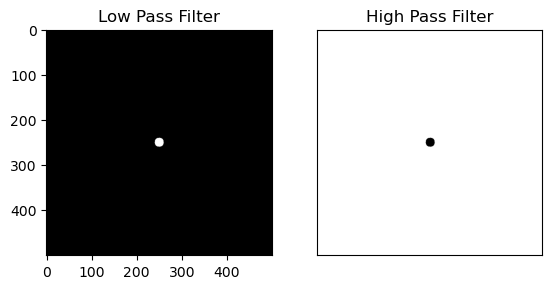

In [116]:
plt.subplot(1, 2, 1)
plt.imshow(lpf, cmap = "gray")
plt.title("Low Pass Filter")
plt.subplot(1, 2, 2)
plt.imshow(hpf, cmap = "gray")
plt.title("High Pass Filter")
plt.xticks([])
plt.yticks([])

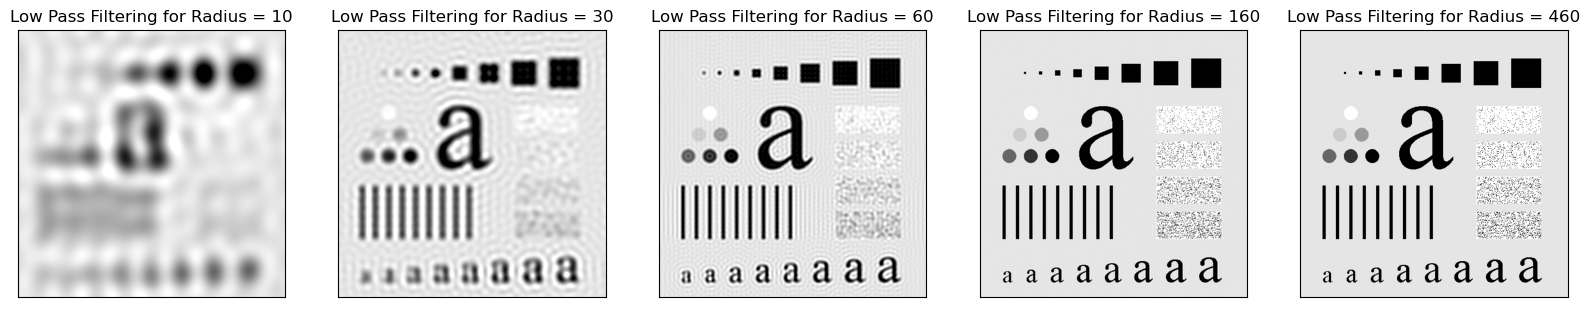

In [117]:
radii = [10, 30, 60, 160, 460]
plt.figure(figsize = (20, 10))
for i in range(len(radii)):
    lpf, hpf = mask(radii[i], m, n)
    
    img_lpf = img_fft*lpf
    img_lpf = np.fft.fftshift(img_lpf)
    imgnew_lpf = np.real(np.fft.ifft2(img_lpf))
    
    img_hpf = img_fft*hpf
    img_hpf = np.fft.fftshift(img_hpf)
    imgnew_hpf = np.real(np.fft.ifft2(img_hpf))
    
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(imgnew_lpf, cmap = "gray", vmin = 0, vmax = 255)
    plt.title("Low Pass Filtering for Radius = {}".format(radii[i]))
    plt.xticks([])
    plt.yticks([])

As we can see, there are concentric circles formed around various features in the images. Known as the ringing effect.

In [106]:
# Butterworth
def  butt_mask(d0, m, n):
    lpf = np.zeros((m, n))
    hpf = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            d1 = np.sqrt((i - m//2)**2 + (j - n//2)**2)
            lpf[i, j] = 1/(1 + (d1/d0)**2)
            
    return lpf, hpf

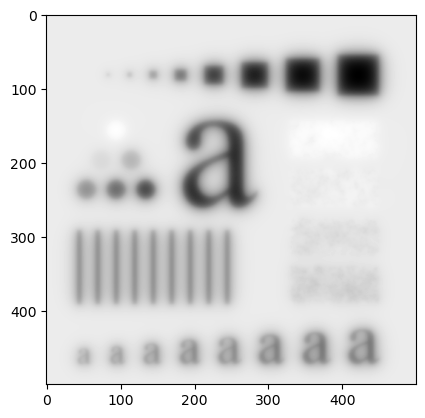

In [108]:
lpf, hpf = butt_mask(10, m, n)
blur_img = np.real(np.fft.ifft2(np.fft.fftshift(img_fft * lpf)))
plt.imshow(blur_img, cmap = "gray")

Butterworth removes the ringing effect which occurs in Ideal LPF.

## Conclusion:
### From the above experiment, I learnt the following:
    a.	Implement suitable frequency domain Butterworth filter to blur the given test image
    b.	Change the filter order and summarize your findings when the filter order increases
